In [283]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [401]:
scaler = StandardScaler()

co_dataset = pd.read_csv('./datasets/CO-2015-2019.csv')
co_headers = co_dataset.iloc[0]
co_dataset  = pd.DataFrame(co_dataset.values[1:], columns=co_headers)

fdp_dataset = pd.read_csv('./datasets/FDP-2015-2019.csv')
fdp_headers = fdp_dataset.iloc[0]
fdp_dataset  = pd.DataFrame(fdp_dataset.values[1:], columns=fdp_headers)

In [402]:
co_dataset.head()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
0,1/1/2015,1:00,1.09,0.21,NaN,1.34,0.87
1,1/1/2015,2:00,1.7,0.23,NaN,1.84,1.43
2,1/1/2015,3:00,1.71,0.2,NaN,1.74,1.84
3,1/1/2015,4:00,1.96,0.21,NaN,2.16,1.75
4,1/1/2015,5:00,1.28,0.24,NaN,1.16,1.72


In [403]:
fdp_dataset.head()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
0,1/1/2015,1:00,78.55,110.01,13.3,NaN,95.53,49.33,31.79,77.30
1,1/1/2015,2:00,159.85,206.11,14.42,NaN,64.11,100.33,94.59,91.20
2,1/1/2015,3:00,100.8,205.72,13.44,NaN,21.53,63.58,98.81,47.60
3,1/1/2015,4:00,53.33,179.01,12.45,NaN,11.17,70.5,89.95,29.40
4,1/1/2015,5:00,32.93,86.91,12.66,NaN,14.32,21.47,70.26,31.30


In [404]:
# И двата дейта сета имат еднакъв брой редове и колони
co_dataset.shape

(43824, 7)

In [405]:
fdp_dataset.shape

(43824, 10)

In [406]:
co_dataset.describe()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
count,43824,43824,42444,39922,35947,6569,42989
unique,1826,24,521,172,416,391,541
top,1/1/2015,1:00,0.31,0.23,0.36,0.34,0.35
freq,24,1826,984,975,759,119,792


In [407]:
fdp_dataset.describe()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
count,43824,43824,42550,42098,39898,35618,40855,6326,43098,1720
unique,1826,24,9059,10282,4932,8156,10638,4042,9879,628
top,1/1/2015,1:00,16.53,25.87,3.63,21.56,2.64,25.29,19.78,21.90
freq,24,1826,27,24,93,23,570,7,24,12


In [408]:
co_dataset = co_dataset.rename(columns={"Sofia-EEA Pavlovo":"Pavlovo", "Sofia - Kopitoto":"Kopitoto", "Sofia - Mladost":"Mladost", "Sofia - Orlov Most":"OrlovMost", "Sofia -Hipodrome":"Hipodrome"})

In [409]:
fdp_dataset = fdp_dataset.rename(columns={"Sofia-Druzhba":"Druzhba", "Sofia - EEA/Pavlovo":"Pavlovo", "Sofia-Kopitoto":"Kopitoto", "Sofia - Mladost":"Mladost", "Sofia-Nadezhda":"Nadezhda", "Sofia - Orlov Most":"OrlovMost", "Sofia - Hipodrome":"Hipodrome", "Gara Yana":"GaraYana"})

In [410]:
sum(co_dataset.duplicated())

0

In [411]:
sum(fdp_dataset.duplicated())

0

In [412]:
co_dataset.isnull().sum()

0
Date             0
Hour             0
Pavlovo       1380
Kopitoto      3902
Mladost       7877
OrlovMost    37255
Hipodrome      835
dtype: int64

In [413]:
fdp_dataset.isnull().sum()

0
Date             0
Time             0
Druzhba       1274
Pavlovo       1726
Kopitoto      3926
Mladost       8206
Nadezhda      2969
OrlovMost    37498
Hipodrome      726
GaraYana     42104
dtype: int64

In [414]:
# Convert string values to float
co_dataset["Pavlovo"] = pd.to_numeric(co_dataset["Pavlovo"], downcast="float")
co_dataset["Kopitoto"] = pd.to_numeric(co_dataset["Kopitoto"], downcast="float")
co_dataset["Mladost"] = pd.to_numeric(co_dataset["Mladost"], downcast="float")
co_dataset["Hipodrome"] = pd.to_numeric(co_dataset["Hipodrome"], downcast="float")

fdp_dataset["Pavlovo"] = pd.to_numeric(fdp_dataset["Pavlovo"], downcast="float")
fdp_dataset["Kopitoto"] = pd.to_numeric(fdp_dataset["Kopitoto"], downcast="float")
fdp_dataset["Mladost"] = pd.to_numeric(fdp_dataset["Mladost"], downcast="float")
fdp_dataset["Hipodrome"] = pd.to_numeric(fdp_dataset["Hipodrome"], downcast="float")
fdp_dataset["Druzhba"] = pd.to_numeric(fdp_dataset["Hipodrome"], downcast="float")
fdp_dataset["Nadezhda"] = pd.to_numeric(fdp_dataset["Hipodrome"], downcast="float")

In [415]:
# Запълваме нълл стойсностите със средното, а не медианата, тъй като нямаме стойности много-над, много-по между останалите стойности за тази колона
# Fill null's for the column's
co_dataset.drop('OrlovMost',axis='columns', inplace=True)
#co_dataset['OrlovMost'].fillna((co_dataset['OrlovMost'].mean()), inplace=True)
co_dataset['Pavlovo'].fillna(method = 'backfill', inplace=True)
co_dataset['Kopitoto'].fillna(method = 'backfill', inplace=True)
co_dataset['Mladost'].fillna(method = 'backfill', inplace=True)
co_dataset['Hipodrome'].fillna(method = 'backfill', inplace=True)

fdp_dataset.drop('OrlovMost',axis='columns', inplace=True)
fdp_dataset.drop('GaraYana',axis='columns', inplace=True)
#fdp_dataset['OrlovMost'].fillna((fdp_dataset['OrlovMost'].mean()), inplace=True)
fdp_dataset['Pavlovo'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Kopitoto'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Mladost'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Hipodrome'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Druzhba'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Nadezhda'].fillna(method = 'backfill', inplace=True)
#fdp_dataset['GaraYana'].fillna((fdp_dataset['GaraYana'].mean()), inplace=True)

In [416]:
co_dataset.isnull().sum()

0
Date         0
Hour         0
Pavlovo      0
Kopitoto     0
Mladost      0
Hipodrome    0
dtype: int64

In [417]:
fdp_dataset.isnull().sum()

0
Date         0
Time         0
Druzhba      0
Pavlovo      0
Kopitoto     0
Mladost      0
Nadezhda     0
Hipodrome    0
dtype: int64

In [255]:
#Interesuvat li ni date time

521

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

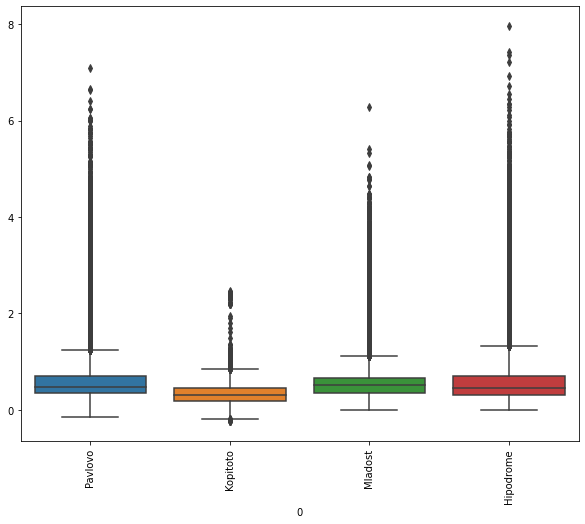

In [432]:
co_measures = co_dataset[["Pavlovo", 'Kopitoto', 'Mladost', 'Hipodrome']]
fdp_measures = fdp_dataset[["Pavlovo", 'Kopitoto', 'Mladost', 'Hipodrome', 'Druzhba', 'Nadezhda']]

fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = co_measures)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

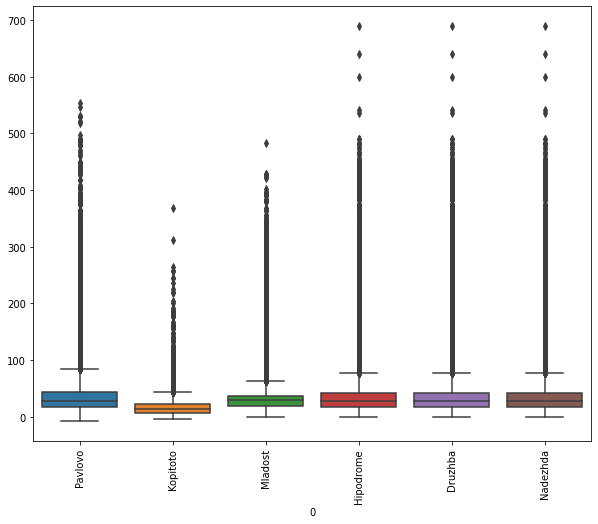

In [433]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = fdp_measures)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [434]:
scaled_co_measures = scaler.fit_transform(co_measures)
scaled_fdp_measures = scaler.fit_transform(fdp_measures)

scaled_co_data =pd.DataFrame(scaled_co_measures, columns = co_measures.columns)
scaled_fdp_data =pd.DataFrame(scaled_fdp_measures, columns = fdp_measures.columns)

scaled_co_data.head()

,Pavlovo,Kopitoto,Mladost,Hipodrome
0,0.727569,-0.578410,-0.163685,0.368238
1,1.755446,-0.479434,-0.163685,1.241833
2,1.772296,-0.627898,-0.163685,1.881430
3,2.193557,-0.578410,-0.163685,1.741031
4,1.047727,-0.429947,-0.163685,1.694231


In [435]:
scaled_fdp_data.head()

,Pavlovo,Kopitoto,Mladost,Hipodrome,Druzhba,Nadezhda
0,1.712591,-0.190866,0.069035,-0.166107,-0.166107,-0.166107
1,4.018960,-0.105507,0.069035,1.224238,1.224238,1.224238
2,4.009600,-0.180196,0.069035,1.317665,1.317665,1.317665
3,3.368569,-0.255647,0.069035,1.121512,1.121512,1.121512
4,1.158198,-0.239642,0.069035,0.685590,0.685590,0.685590


In [436]:
scaled_co_data.describe()

,Pavlovo,Kopitoto,Mladost,Hipodrome
count,4.382400e+04,4.382400e+04,4.382400e+04,43824.000000
mean,6.963668e-09,-5.570934e-09,1.392734e-08,0.000000
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011
min,-1.345034e+00,-2.805361e+00,-1.245135e+00,-0.988955
25%,-5.193627e-01,-6.773856e-01,-5.241683e-01,-0.520958
50%,-3.171575e-01,-1.330198e-01,-1.636852e-01,-0.286959
75%,8.725278e-02,6.092969e-01,1.331833e-01,0.118639
max,1.085468e+01,1.055634e+01,1.207154e+01,11.428580


In [437]:
scaled_fdp_data.describe()

,Pavlovo,Kopitoto,Mladost,Hipodrome,Druzhba,Nadezhda
count,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04
mean,2.089100e-09,-6.963668e-10,3.133650e-09,-2.089100e-09,-2.089100e-09,-2.089100e-09
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.124892e+00,-1.526883e+00,-1.133089e+00,-8.603935e-01,-8.603935e-01,-8.603935e-01
25%,-5.193797e-01,-6.727238e-01,-5.020729e-01,-4.798199e-01,-4.798199e-01,-4.798199e-01
50%,-2.592231e-01,-1.801960e-01,-1.620416e-01,-2.721538e-01,-2.721538e-01,-2.721538e-01
75%,1.182919e-01,4.478010e-01,6.903487e-02,5.373593e-02,5.373593e-02,5.373593e-02
max,1.234685e+01,2.690827e+01,1.476609e+01,1.439842e+01,1.439842e+01,1.439842e+01


[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

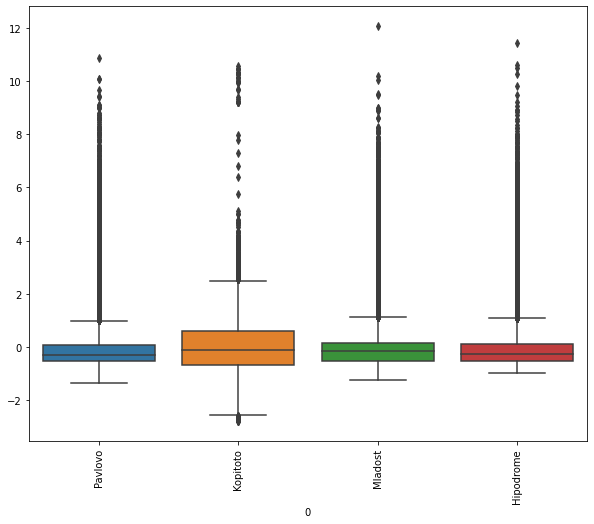

In [438]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = scaled_co_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

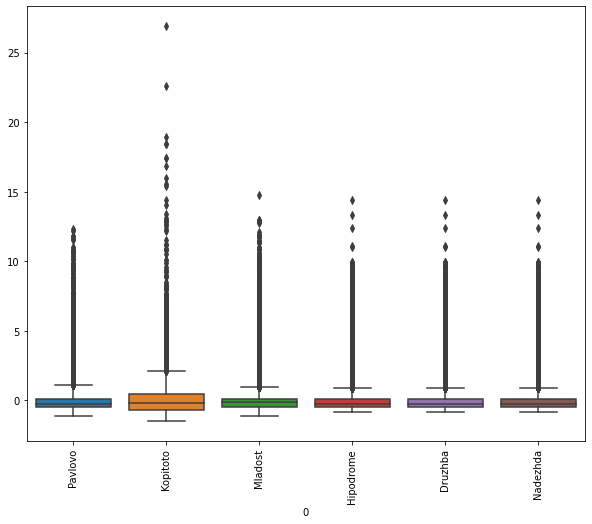

In [439]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = scaled_fdp_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [440]:
coQ1 = co_measures.quantile(0.25)
coQ3 = co_measures.quantile(0.75)
co_IQR = coQ3 - coQ1
print(co_IQR)

0
Pavlovo      0.36
Kopitoto     0.26
Mladost      0.31
Hipodrome    0.41
dtype: float64


In [441]:
fdpQ1 = fdp_measures.quantile(0.25)
fdpQ3 = fdp_measures.quantile(0.75)
fdp_IQR = fdpQ3 - fdpQ1
print(fdp_IQR)

0
Pavlovo      26.570002
Kopitoto     14.702500
Mladost      17.350000
Hipodrome    24.100000
Druzhba      24.100000
Nadezhda     24.100000
dtype: float64


In [442]:
co_outliers_removed_data = co_measures[~((co_measures<(coQ1-1*co_IQR))\
                                        | (co_measures>(coQ3+1*co_IQR))).any(axis=1)]
co_outliers_removed_data.shape

(33711, 4)

In [444]:
fdp_outliers_removed_data = fdp_measures[~((fdp_measures<(fdpQ1-1*fdp_IQR))\
                                        | (fdp_measures>(fdpQ3+1*fdp_IQR))).any(axis=1)]
fdp_outliers_removed_data.shape

(35146, 6)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome')]

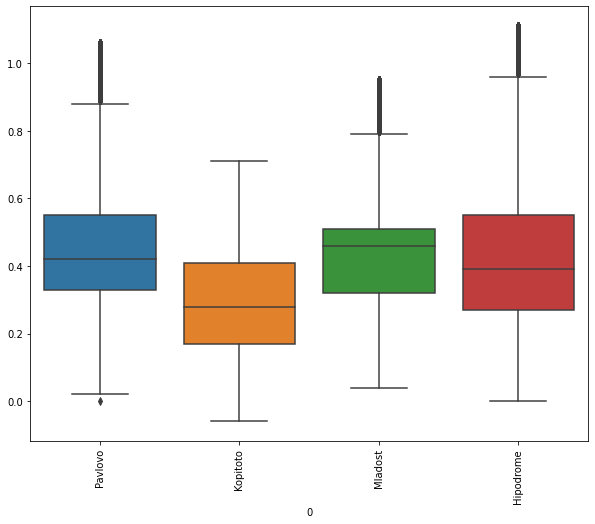

In [445]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = co_outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Pavlovo'),
 Text(1, 0, 'Kopitoto'),
 Text(2, 0, 'Mladost'),
 Text(3, 0, 'Hipodrome'),
 Text(4, 0, 'Druzhba'),
 Text(5, 0, 'Nadezhda')]

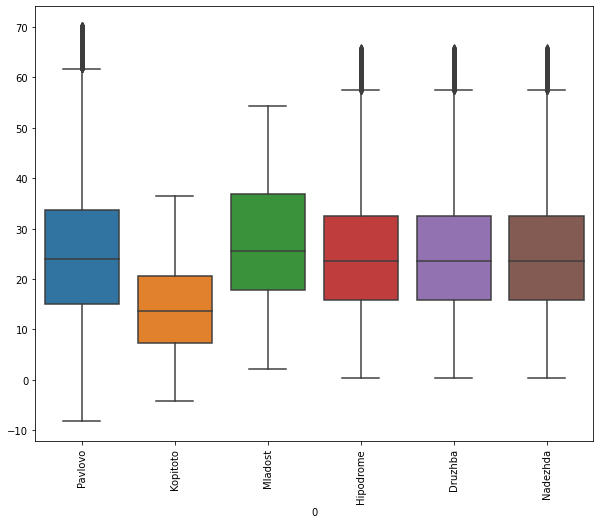

In [446]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = fdp_outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)